### Sparse linear models for image denoising

### What are sparse methods?

Sparse methods in signal processing use special structure that is shared by some signals, that enables representing them as linear combinations of base signals ('atoms') with few nonzeros or big values.

Example applications:

### Image denoising

![](https://docs.opencv.org/3.1.0/nlm_result1.jpg)

![](http://alumni.soe.ucsc.edu/~htakeda/KernelDeblurring/images/cameraman_19x19_BSNR40dB_RMSE296733.png)
![](http://alumni.soe.ucsc.edu/~htakeda/KernelDeblurring/images/cameraman_19x19_BNSR40dB_Wiener_K00003_RMSE171663.png)

### Source Separation
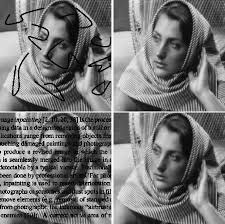

Other applications

* superresolution (AKA image upsampling)
* image compression
* style transfer

#### Teaser

* Heard about Dictionary Learning? What is `sklearn.decomposition.DictionaryLearning`?
* Seen Orthogonal Matching Pursuit? What is `sklearn.linear_model.OrthogonalMatchingPursuit`?
* JPEG algorithm

One example of method that in practice works like sparse method is JPEG algorithm. Its quantization step, which is done after Discrete Cosine Transform works by zeroing out small coefficients (this is actually only lossy step). In fact, this example is equivalent to thresholding method, which we will cover later.

### Linear equations and sparsity

Consider linear system $Ax = y$. For now we'll assume that this system has solution, but it might have many such solutions.

Sparse methods aim at finding canonical solution where there might be many potential guesses - the original problem becomes

Find $x$ such that $Ax = y$, and $x$ is *sparse*.

### How to define sparsity precisely?

In math/signal processing several types of metrics are used to measure sparsity.

#### $L_0$ and $L_1$

Sparsity is most commonly measured using $L_0$ metric or $L_1$ 'metric'.

$L_1$ metric, also known as Manhattan distance, is defined as

$\|x\|_1 = \sum_{i}{|x_i|}$ 

Whereas $L_0$ is not actually a metric, and is defined as

$\|x\|_0 = supp(x) =$ *number of nonzero coefficients in* $x$

Why use two separate notions? 

Answer: $L_0$ is not even continuous, and it is hard to optimize. 

In general leads to NP-hard optimization problem!

$L_1$ on the other hand is continuous and convex. Also, $L_1$ can be thought of as a relaxation (convexification) of $L_0$:

![image of L1 vs L0 'unit balls'](https://www.intechopen.com/media/chapter/56837/media/F4.png)

In fact, finding $x$ such that

$Ax = b$ ,  $\|x\|_1$ minimal

can be solved with linear program.

### L1 vs L2 (Euclidean) norm

A person familiar with regularization in linear regression might ask: 

What's the difference between minimizing $\|x\|^2$ and $\|x\|_1$ while solving  $Ax = b$?

Doesn't minimizing Euclidean norm lead to small coefficients?

The problem: structure:

## L1 vs L2 - example

$x \in \mathbb{R}^d, x_i = \sqrt{\frac{1}{d}}$.

Then

$\|x\|^2 = \sum_{i=0}^d \frac{1}{d} = 1$

But

$\|x\|_1 = \sum_{i=0}^d{\sqrt{\frac{1}{d}}} = d {\sqrt{\frac{1}{d}}} = \sqrt{d}$


### Comment on sparse data structures

Sparsity in mathematics/signal processing is related, but not equal to sparsity from computer science point of view.
In computer science sparse matrix is a data structure that holds only nonzero coefficients.
The relation between sparse data structure and mathematial notion lies in fact that sparse matrix data structure works well for representing matrices sparse in precise sense - this is also actually used in many 'sparse algorithms'.

### Dictionary learning and related terminology

Convention:

$x \approx D\alpha$ where $\alpha$ is found with some kind of sparse method.

The $D$ matrix is called dictionary.

$\alpha$ gives $x$'s *decomposition into atoms*.

Examples of dictionaries:

* Fourier transforms (JPEG uses Discrete Cosine Transform)
* Wavelet transforms

$D$ might be also learned from training data, which is the task of dictionary learning.

### Denoising problem formulation

In denoising most commonly we pose problem as

$y = x_{noisy} = x + \epsilon$ where $\epsilon$ has iid. normally distributed coefficients with zero mean and std. dev $\sigma$.

### Sparse models for denoising

Using our terminology we pose the problem as

Minimize $\|x - D\alpha\|^2$ with $\|\alpha\|_0 \leq k$

#### Optimization algorithm

One of the simplest algorithms for solving such problems is thresholding algorithm:

In [1]:
def thresholding(D, x, t):
    coeffs = D.T @ x
    mask = np.abs(coeffs) > t
    return coeffs * mask

Note that this algorithm naturally enforces sparsity - as `t` increases, it can only zero out more coefficients.

#### Used dictionary

For this part we will use Daubechies wavelets coefficients.

#### How can it be extended

* Use different wavelet transform

* Use patch-based processing, and then average the patches (`sklearn.feature_extraction.image.extract_patches_2d`)
 
* Use different algorithm (these methods are called *pursuit algorithms*), for example Orthogonal Matching Pursuit or Basis Pursuit

* Dictionary learning: adapt (note that this would require multiple images, or image patches)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_image_denoising_001.png)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_image_denoising_002.png)

### Advanced topics

#### Other method that could utilize sparsity

Sparsity naturally comes up in matrix factorization (from using some form of L1 regularization)

The general form of matrix factorization

$argmin_{A, X} \rho(Y, AX) + \lambda \phi(A) + \gamma \psi(X)$ 

$\rho$ is most commonly some matrix norm, for example PCA solves problem with $\rho(Y, AX) = \|Y - AX\|^2_F,\phi, \psi = 0$

* Nonnegative Matrix Factorization (**TODO** link this with NMF on arXiv )

* Sparse PCA (like PCA, but $\psi(X) = \sum_{i}{\|X_i\|_1}$)

* Robust PCA ($\psi(X) = \sum_{i}{\|X_i\|_1}$, $\phi(A) = \|A\|_{*} = tr(\sqrt{A^T A}) = $ *sum of $A$'s singular values*)

* Sparse autoencoders

#### Maximum A Posteriori estimation
A precise way to formulate the problem is to pose it as Maximum A Posteriori estimation:

Recall that Maximum A Posteriori estimate of parameters $X$ given data $Y$ is defined as maximizing 

$$\hat{X} = argmax_{X}P(X | Y)$$

Thus expression analogous to negative log-likelihood becomes (with Gaussian noise)

$-logP(X | Y) \propto -log(P(Y|X)P(X)) \propto -log(e^{\|Y - DX\|^2} e^{\lambda\|X\|_1}) =  \|Y - DX\|^2 + \lambda\|X\|_1$

## Resources

The go-to person for topics on sparse models in image & signal processing is [Michael Elad](https://elad.cs.technion.ac.il/#), author of:

[Five Lectures on Sparse and Redundant Representations](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjptojVpsPgAhUNt4sKHfihCIgQFjAAegQIChAC&url=https%3A%2F%2Felad.cs.technion.ac.il%2Fwp-content%2Fuploads%2F2018%2F02%2FPCMI2010-Elad.pdf&usg=AOvVaw3Z1qVcrj-01ikUQU84KkKO) - an introductory article

[Sparse and Redundant Representations](https://www.edx.org/professional-certificate/israelx-sparse-representations-from-theory-to-practice) edX Specialization

For statistical learning point of view:

[Statistical Learning with Sparsity](https://web.stanford.edu/~hastie/StatLearnSparsity/) book - its authors were working with people who came up with these ideas in the first place

In context of signal processing these topics are also jointly called *compressed sensing*. People who are working in this branch tend to work on random matrix theory, for example Emanuel Candes and Terence Tao.